## Training the different Tic Tac Toe Players
In this notebook we will train and evaluate different players of the game Tic Tac Toe.

In [1]:
import matplotlib.pyplot as plt
from Players import RandomPlayer, MiniMaxPlayer, AlphaBetaPlayer, QPlayer, SmartPlayer
from Game import TicTacToe

import numpy as np
import torch

In [2]:
def draw(count, player1wins, player2wins, draws, player1, player2):
    plt.figure(figsize=(10,5))
    plt.ylabel('Game outcomes in %')
    plt.xlabel('Game number')

    plt.plot(count, player1wins, 'g-', label='{} wins'.format(player1.name))
    plt.plot(count, player2wins, 'b-', label='{} wins'.format(player2.name))
    plt.plot(count, draws, 'r-', label='Draw')

    plt.grid(True)
    plt.legend(loc='upper center', bbox_to_anchor=(0.5,1.12), shadow=False, fancybox=True, framealpha=0.3, ncol=3)
    plt.show()
    

def train(player1, player2, rounds=10, battles=10):
    game = TicTacToe(player1, player2)
    count, player1wins, player2wins, draws = game.train(rounds, battles)
    
    draw(count, player1wins, player2wins, draws, player1, player2)
    
def test(player1, player2, rounds=10, battles=10):
    game = TicTacToe(player1, player2)
    count, player1wins, player2wins, draws = game.test(rounds, battles)

    draw(count, player1wins, player2wins, draws, player1, player2)


## 1. Using the Q table

100%|██████████| 200/200 [00:13<00:00, 15.38it/s]


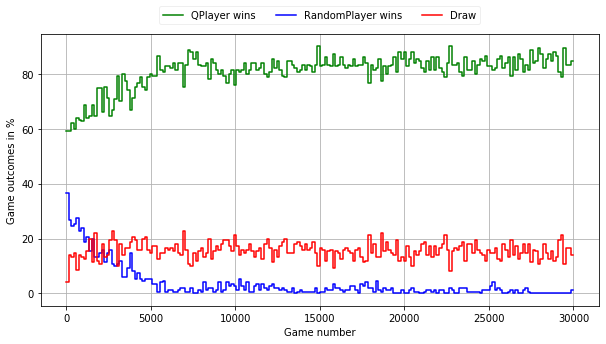

In [15]:
QPlayer1 = QPlayer(lr=0.9, lrdecay=1., exploration=0.1, explorationdecay=0.8)
QPlayer1.rewards = {"WINNER": 1.0, "LOSER":-1.0, "MADEDRAW":0.8, "CHOSEDRAW":0.5}

train(QPlayer1, RandomPlayer(), rounds=200, battles=150)

100%|██████████| 50/50 [00:46<00:00,  1.07it/s]


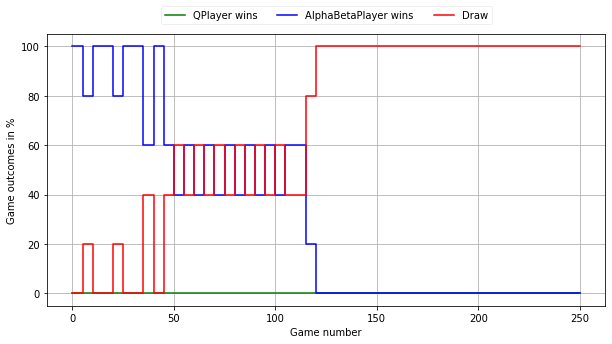

In [16]:
QPlayer2 = QPlayer(lr=0.7, lrdecay=1.0, exploration=0.3, explorationdecay=0.95)
QPlayer2.rewards = {"WINNER": 1.0, "LOSER":-1.0, "MADEDRAW":0.8, "CHOSEDRAW":0.5}

train(QPlayer2, AlphaBetaPlayer(), rounds=50, battles=5)
QPlayer2.savePolicy()

## 2. Playing against one's own

100%|██████████| 100/100 [00:06<00:00, 15.25it/s]


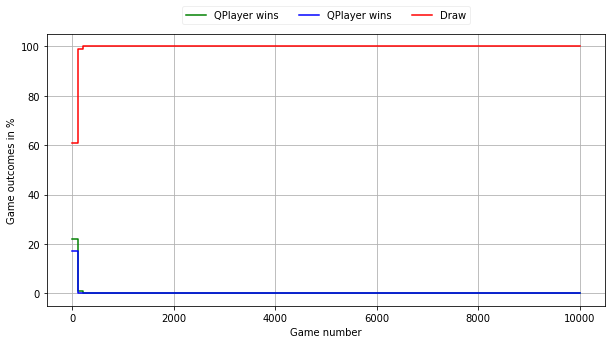

In [32]:
QPlayer3 = QPlayer(lr=0.3, lrdecay=1.0, exploration=0.3, explorationdecay=0.95)
QPlayer4 = QPlayer(lr=0.3, lrdecay=1.0, exploration=0.3, explorationdecay=0.95)

train(QPlayer3, QPlayer4, rounds=100, battles=100)

## 3. A player with a 'real' brain

100%|██████████| 200/200 [02:39<00:00,  1.25it/s]


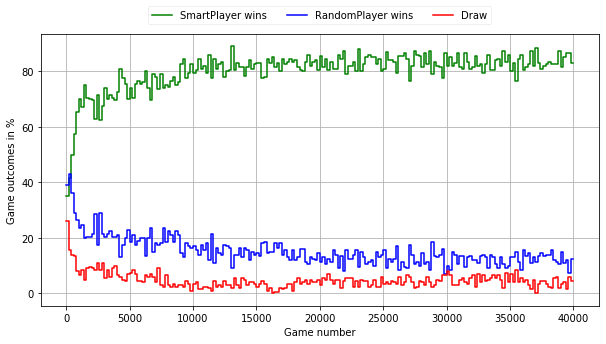

In [39]:
SmartPlayer1 = SmartPlayer(nodes=9, lr=0.1, lrdecay=1.0)
SmartPlayer1.rewards = {"WINNER": 1.0, "LOSER":0.0, "MADEDRAW":0.2, "CHOSEDRAW":0.0}

train(SmartPlayer1, RandomPlayer(), rounds=200, battles=200)


In [ ]:
SmartPlayer2 = SmartPlayer(nodes=36, lr=0.2, lrdecay=0.9)
SmartPlayer2.rewards = {"WINNER": 1.0, "LOSER":0.0, "MADEDRAW":1.0, "CHOSEDRAW":1.0}

train(SmartPlayer2, AlphaBetaPlayer(), rounds=50, battles=20)
SmartPlayer2.savePolicy()

 56%|█████▌    | 28/50 [02:00<01:35,  4.33s/it]

In [ ]:
board = torch.zeros(3,3)
board[0,1] = board[1,2] = 1
board[2,0] = board[1,0] = -1
print(board)

output = SmartPlayer2._activebrain(board.flatten()).reshape(3,3)
print(output)

board = torch.zeros(3,3)
board[0,1] = board[1,2] = -1
board[2,0] = board[1,0] = 1
print(board)

output = SmartPlayer2._activebrain(board.flatten()).reshape(3,3)
print(output)


100%|██████████| 100/100 [01:41<00:00,  1.02s/it]


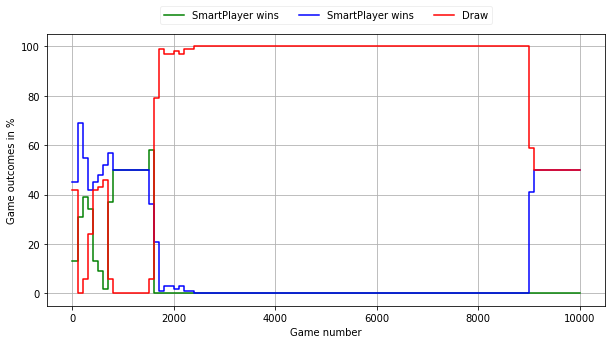

In [27]:
SmartPlayer1 = SmartPlayer(nodes=18, lr=0.1, lrdecay=1.0)
SmartPlayer1.rewards = {"WINNER": 1.0, "LOSER":0.0, "MADEDRAW":0.8, "CHOSEDRAW":0.8}

SmartPlayer2 = SmartPlayer(nodes=18, lr=0.1, lrdecay=1.0)
SmartPlayer2.rewards = {"WINNER": 1.0, "LOSER":0.0, "MADEDRAW":0.8, "CHOSEDRAW":0.8}

train(SmartPlayer1, SmartPlayer2, rounds=100, battles=100)